# Classical Machine Learning Algorithms

## Introduction

In this notebook we will cover different classical ML algorithms as discussed in the book **The Elements of Statistical Learning** (second edition), written by Travor Hastie, Robert Tibshirani, and Jerome Friedman. The point here is to focus on the algorithms, not the mathematics. We will explain these algorithms mostly "with the hands", and give just enough information to understand why it works or not. For more details, please refer to the book ;)

## Requirements

In this section are described the different libraries we'll use in order to implement and test our algorithms. Here is a list that will grow through our progression :
 - *Numpy* (data representation, matrix operations)
 - *Pyplot* (data visualisation)
 - *datasets.py* (custom module where we implement conveniently reusable datasets)

__Notes on datasets.py:__ This module will be updated with the different needs we have for the testing and development of our algorithms

In [2]:
from datasets import NormalDataSet
import matplotlib.pyplot as plt
import numpy as np

## Least Squares and Nearest Neighbors

These thress methods are some of the most used and the most simple ones. In fact, an important number of methods rely or are variants of Least Squares and Nearest Neighbors.

For our journey in the ML universe, we shall understand and implement them.

### First, let's build a dataset, and import our code

The dataset used is generated with a Normal distribution. See dataset.py for the code. It will be used for at least the three methods discussed in this section.

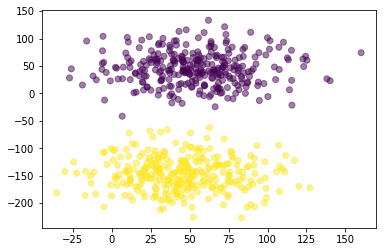

In [9]:
from basic_models import LinearModel, plot_classification_results

nds = NormalDataSet(items=300, scale=30)
nds.plot_2d()
plt.show()

### Linear Model by the Least Squares method

#### Explanations

The linear model is one of the most basic classification model we can form. This is just a warming-up. This model works on only two classes.

TODO: explain the mathematics

#### Experiments in two dimensions

For this simple model we don't bother with separating our dataset into a training and a validation ones yet.

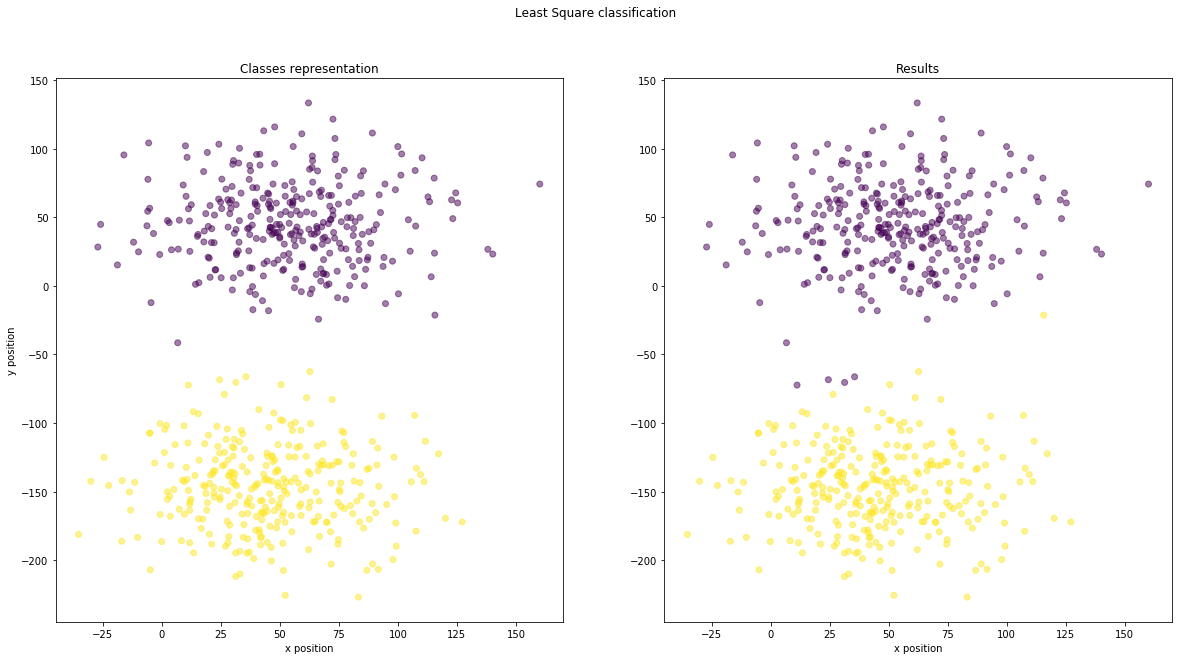

In [10]:
plt.figure(figsize=(20, 10))

lin_mod = LinearModel()
lin_mod.fit(nds)
lin_mod.plot_2d()

plt.show()

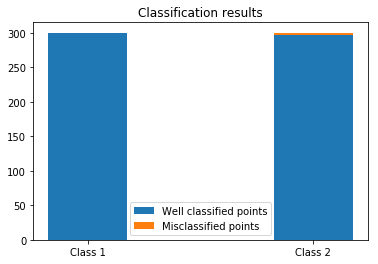

In [11]:
plot_classification_results(nds, [lin_mod])

#### Experiments in higher dimensions

The results in 2D seem ok. Let's try with more dimensions.

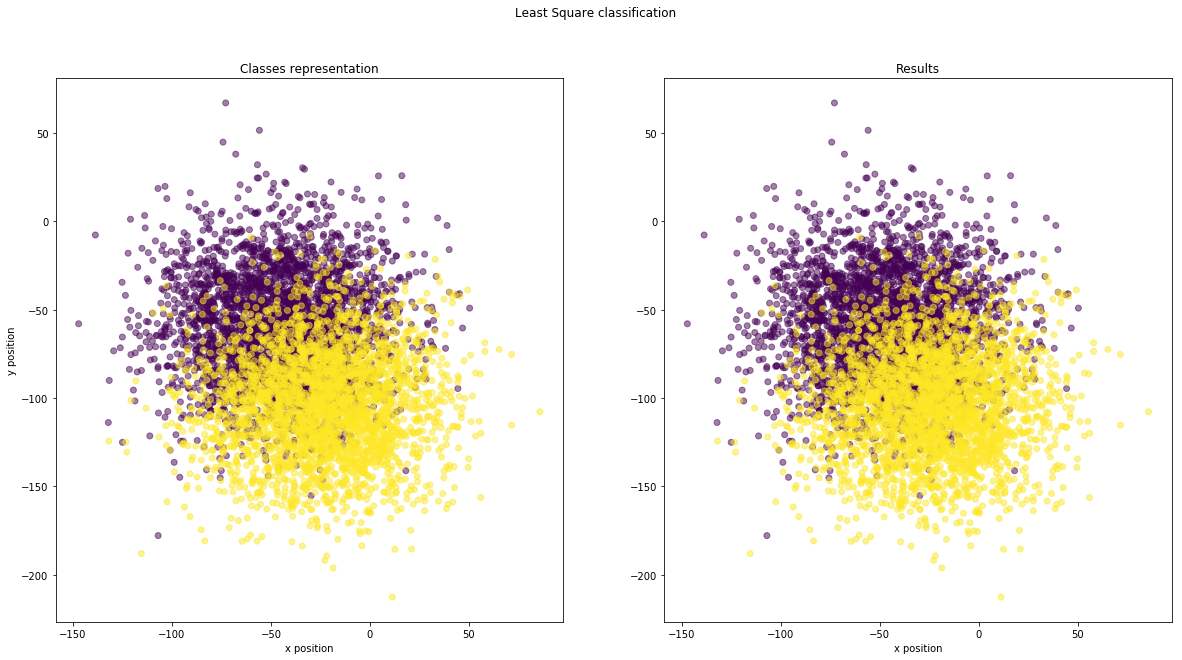

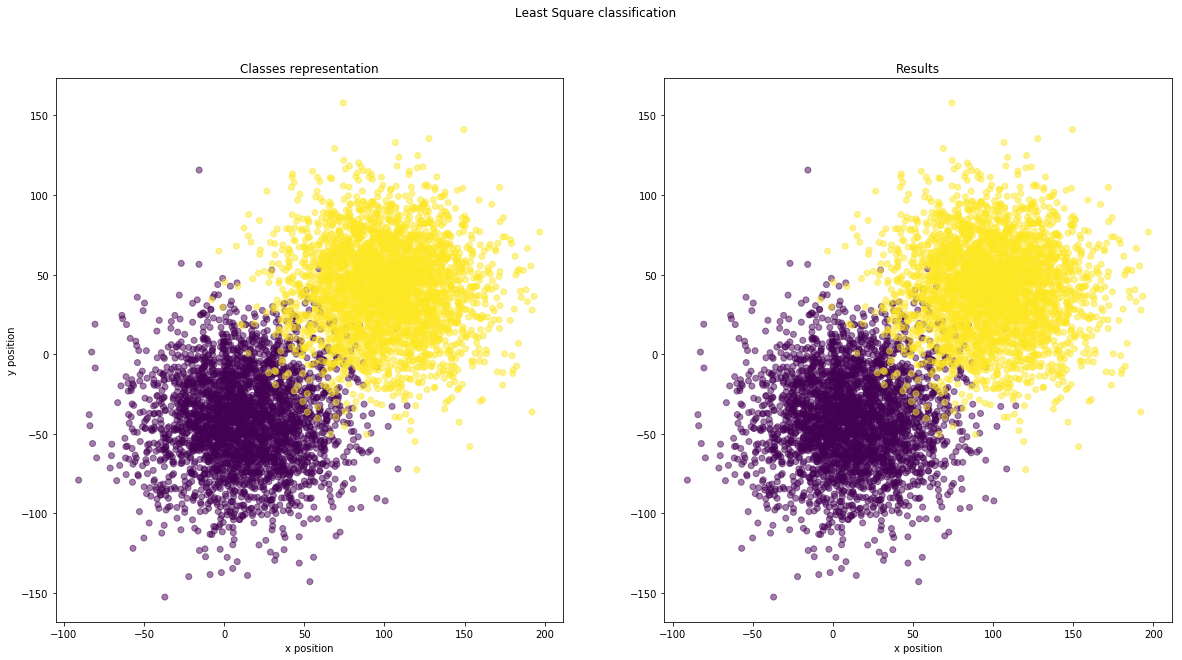

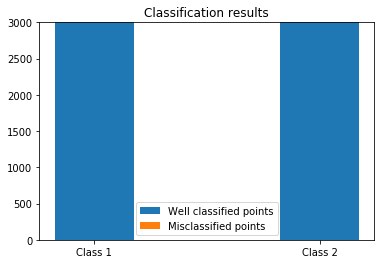

In [34]:
nds = NormalDataSet(dim=20, items=3000, scale=30)
lin_mod.fit(nds)
plt.figure(figsize=(20, 10))
lin_mod.plot_2d()
plt.show()
plt.figure(figsize=(20, 10))
lin_mod.plot_2d(d0=3, d1=6)
plt.show()
plot_classification_results(nds, [lin_mod])
plt.show()

The results here a clearly better. Knowing that we are looking for the hyperplane that best separate the classes, we can assume that the more dimensions there are, the more likely is the existance of a good hyperplane separating the data.

#### Conclusion

As we can see this model can solve some very simple problems. When it comes to higher dimensions, the classification results seem even better. However, when repeating on different datasets, we note that the method is not very robust in low dimensons. Sometimes, the entire dataset is misclassified, especially when the data from each class is mixed, with no clear geometrical separation. However, the entire point of this algorithm is to use the geometrical structure of the data, so in this case, we should clearly use another algorithm for our classification

### K Nearest Neighbor method

One of the limitations of the linear model is that it can not be used on more than 2 classes. Here we discuss the K-Nearest-Neighbor algorithm, which can be used on any number of classes.

#### Explanations

The K Nearest Neighbors method expresses the results of the classification as the average of sample's K nearest neighbors classes :

$
    \hat{Y}(X) = \frac{1}{K}\sum_{x_i \in N_K(X)}{Y_i}
$

Where $\hat{Y}$ denotes the prediction over the sample $X$, and $N_K(X)$ the neighborhood of X.

Again, this method is quite straightforward. In our implementation we process this raw result to make sure that it belongs to the class set.

The code can be found in the basic_models module

In [14]:
from basic_models import NearestNeighbors

#### Experiments in two dimensions

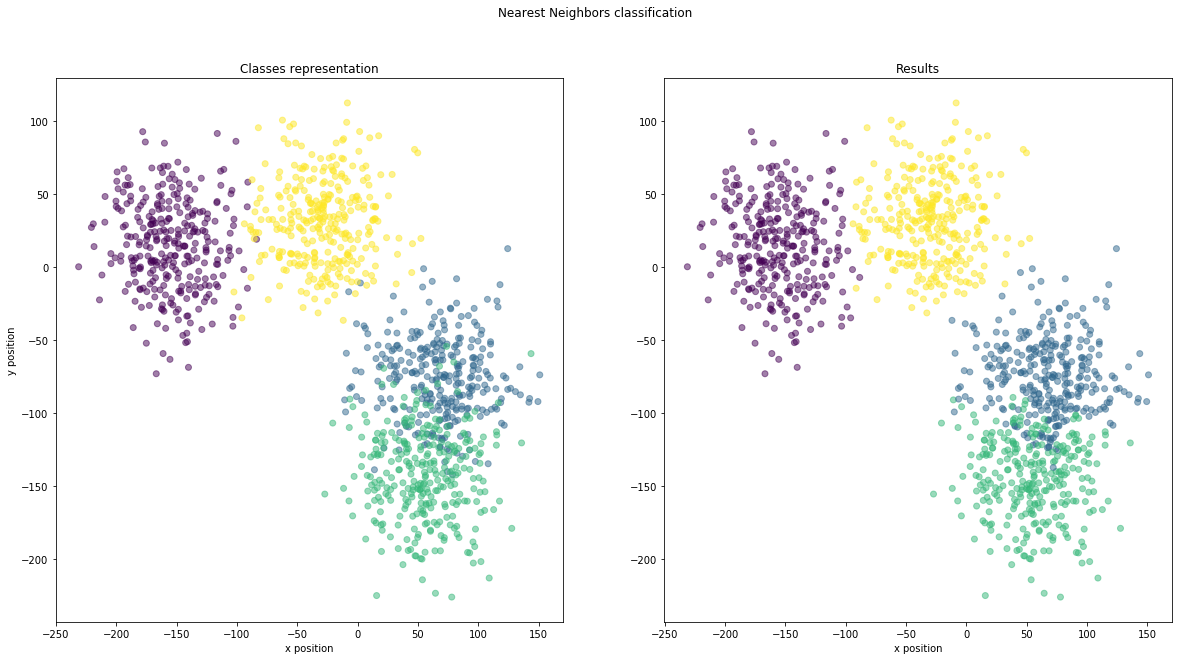

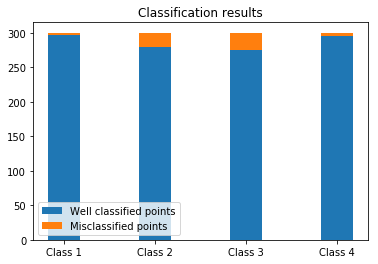

In [23]:
nds = NormalDataSet(items=300, scale=30, nb_class=4)
Knn = NearestNeighbors(k=3)
Knn.fit(nds)
plt.figure(figsize=(20, 10))
Knn.plot_2d()
plt.show()
plot_classification_results(nds, [Knn])
plt.show()

Nothing special here, the results are ok.

#### Experiments with more dimensions

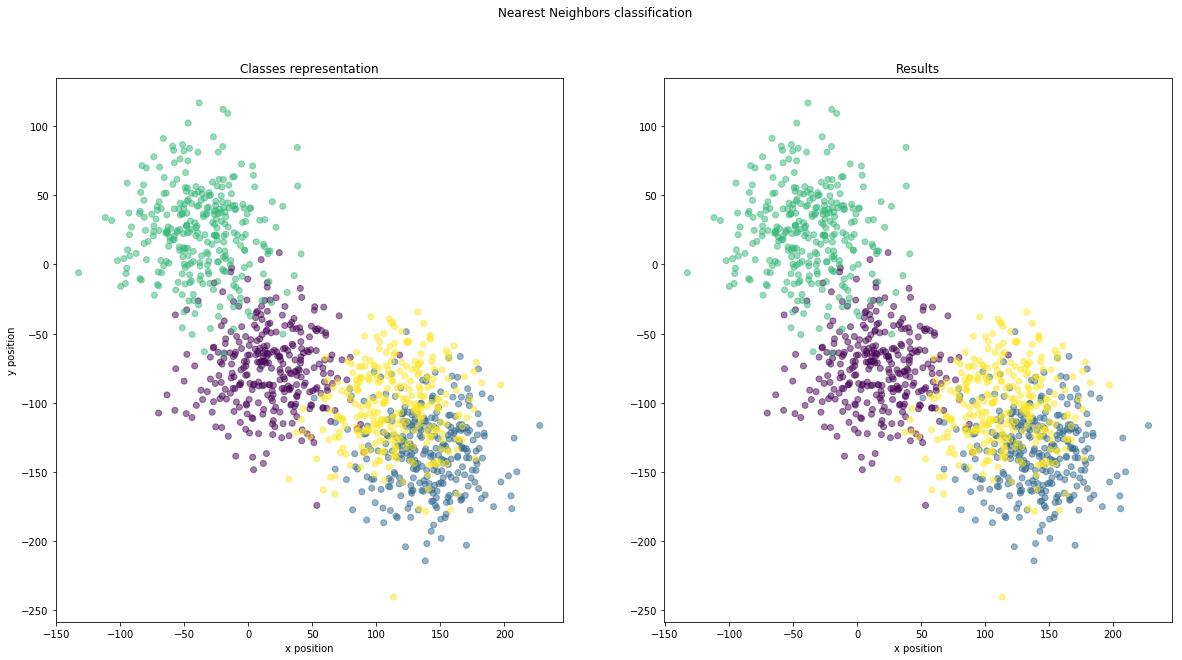

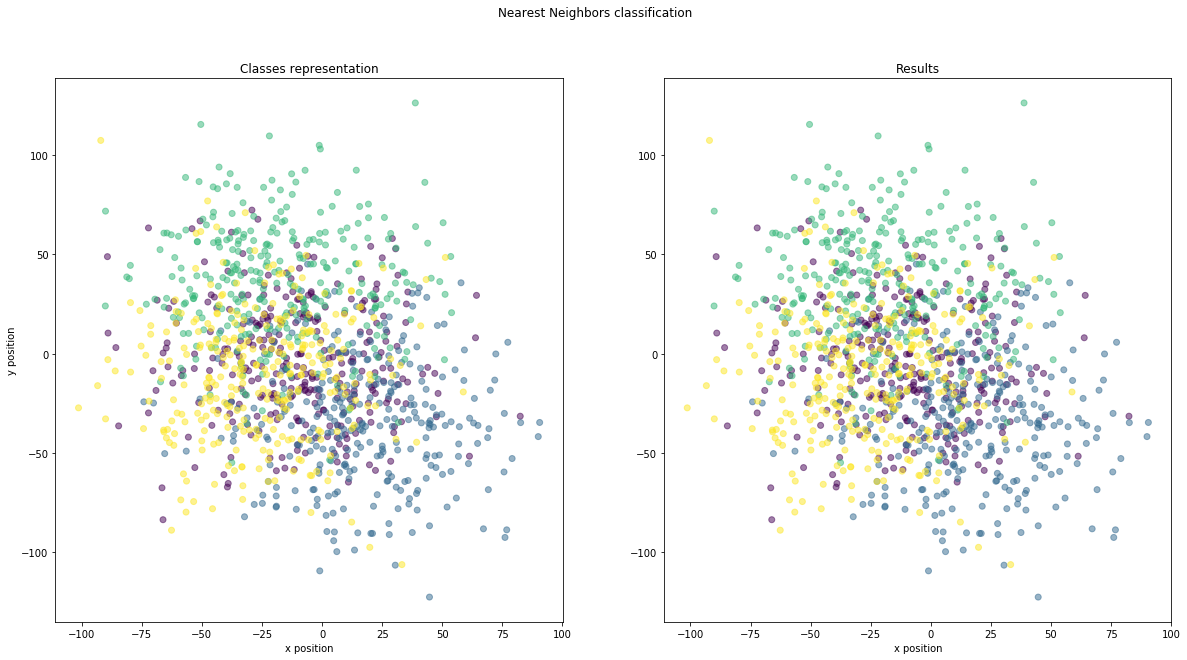

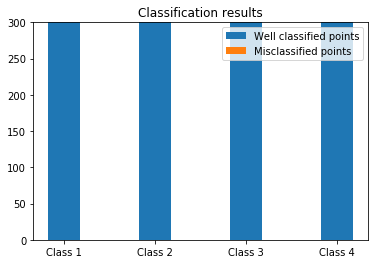

In [26]:
nds = NormalDataSet(items=300, scale=30, dim=50, nb_class=4)
Knn = NearestNeighbors(k=3)
Knn.fit(nds)
plt.figure(figsize=(20, 10))
Knn.plot_2d()
plt.show()
plt.figure(figsize=(20, 10))
Knn.plot_2d(d0=3, d1=6)
plt.show()
plot_classification_results(nds, [Knn])
plt.show()

Like the least square method, the results with more dimensions seem better. Again, this is due to the more likely the geometry of the data is to be visible. 

#### Impact of the hyperparameter K

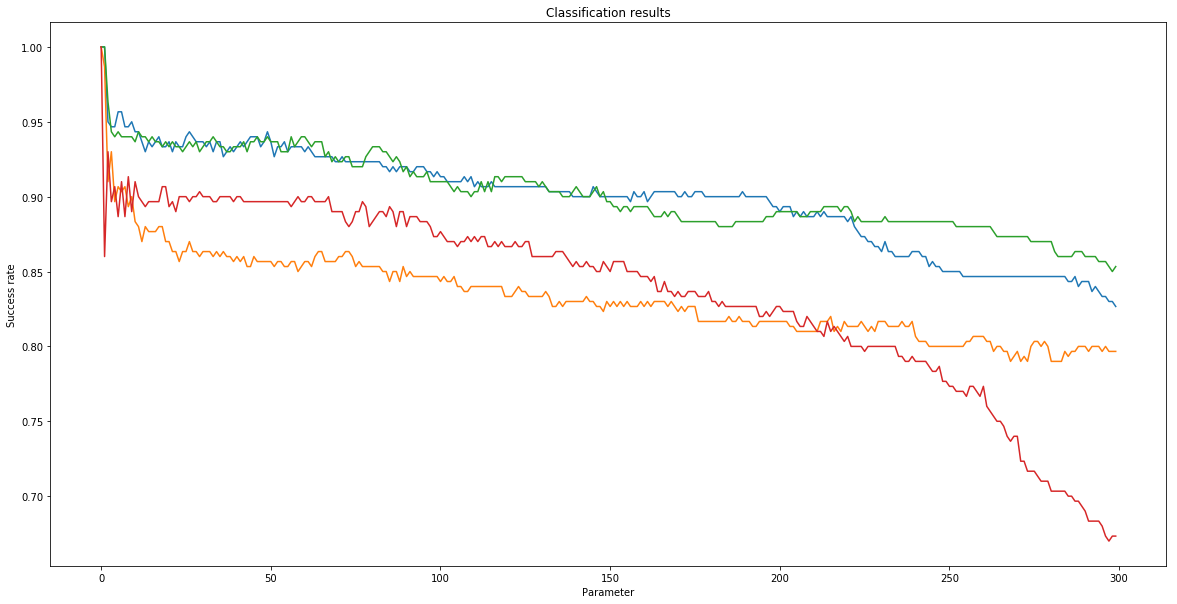

In [32]:
nds = NormalDataSet(items=300, scale=30, nb_class=4)
def generator(ds):
    for k in range(1, 301):
        Knn = NearestNeighbors(k=k)
        Knn.fit(ds)
        yield Knn

plt.figure(figsize=(20, 10))
plot_classification_results(nds, list(generator(nds)))
plt.show()

We can notice that the success rate for each class decreases significantly with an increasing K parameter. This is obviously due to the introduction of more approximations.

#### Conclusion

This algorithm will always be able to find a structure in the data, by tuning the K parameter. However, if a 1-Nearest-Neighbor will always fit to the data, it is less likely to generalize on different datasets. This is what we call overfitting. We will discuss this problem later.

### Conclusion on Least-Squares and KNN

Although these algorithms can be proved efficients on simple classification problem, the limitations come quickly. Both are also supervised learning techniques, so they will not be able to define a structure in the data, just recognize it.

To critisize our results, we should note that we always use a Normal dataset in this section for testing. This is just an introduction, but we will improve our testing methods in the next sections. Separating training and test datasets will also be necessary.

Nevertheless, we implemented our first machine learning algorithms!

## Next steps

- [ ] Some methodology
    - [ ] Use of separated training and testing datasets
    - [ ] Use of different types of data
    - [ ] Better error computation method